In [5]:
import BurnUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [6]:
# Read data from mesa data: 
a = pd.read_excel("/home/sailor/Documents/git_fun/xinlong_file/burn_cell_python/data/ONe6040_update.xlsx")
a.head()

,zone,logT,logRho,logP,logR,luminosity,conv_vel,grav,eps_grav,log_abs_eps_grav_dm_div_L,...,delta_T,delta_rho,delta_eps_nuc,delta_mu,nz_minus_k,eps_nuc_mc2,eps_nuc_neu,eps_nuc_eos,log_rate_r_n20_wk_f20,log_rate_r1616
0,1,6.449001,-2.050754,12.114770,-2.673357,724.013527,0.0,8.450847e+09,3.454532e+13,-3.174188,...,-17.959033,9.370495e-08,-1.564110e-198,3.688741e-08,1903,2.682363e-195,0.0,-6.083493e-210,-99.0,-99.0
1,2,6.541620,-1.787840,12.472254,-2.673422,723.528731,0.0,8.453379e+09,4.324352e+13,-3.076365,...,-12.742761,2.432423e-07,-3.179911e-190,1.892295e-08,1902,1.055795e-186,0.0,-2.041282e-201,-99.0,-99.0
2,3,6.582557,-1.631117,12.665693,-2.673458,722.921868,0.0,8.454763e+09,4.454301e+13,-3.063142,...,-11.966833,3.802286e-07,-1.172476e-186,1.784207e-08,1901,4.783129e-183,0.0,-1.086942e-197,-99.0,-99.0
3,4,6.609343,-1.521033,12.799079,-2.673483,722.296768,0.0,8.455728e+09,3.710949e+13,-3.142061,...,-11.906908,5.087084e-07,-2.334145e-184,1.814348e-08,1900,1.049456e-180,0.0,-2.354483e-195,-99.0,-99.0
4,5,6.629321,-1.436337,12.900996,-2.673502,721.775987,0.0,8.456476e+09,3.139292e+13,-3.214401,...,-12.046699,6.310639e-07,-1.156119e-182,1.877611e-08,1899,5.497571e-179,0.0,-1.301387e-193,-99.0,-99.0


In [7]:
# Read data from MAESTROeX result: 
b = pd.read_csv("/home/sailor/Documents/git_fun/xinlong_file/burn_cell_python/data/plt0000001.csv")
b.head()

,radius,Hnuc [erg/g/s],h [erg/g],tfromp,p0,rho,X(h1),X(he4),X(o16),X(o20),X(f20),X(ne20),X(mg24),X(al27),X(si28),X(p31),X(s32)
0,1171875.0,5.996968e+10,3.318201e+18,6.753616e+08,7.339735e+27,8.319326e+09,9.896163e-11,6.767372e-15,0.599992,0.389997,2.704791e-09,0.010006,1.175195e-10,8.668112e-11,4.995970e-06,8.310088e-11,1.098132e-10
1,3515625.0,7.083261e+10,3.319842e+18,7.382075e+08,7.230342e+27,8.188654e+09,9.873312e-11,4.052194e-15,0.599956,0.370272,7.404318e-09,0.029744,1.414339e-10,8.389392e-11,2.756156e-05,7.921163e-11,1.107981e-10
2,5859375.0,9.372812e+10,3.356157e+18,8.629453e+08,7.015789e+27,7.855433e+09,9.816014e-11,1.938353e-15,0.598857,0.283351,3.649090e-08,0.117065,2.435516e-10,7.610581e-11,7.262482e-04,7.016649e-11,1.121569e-10
3,8203125.0,7.972904e+10,3.453166e+18,7.984187e+08,6.733141e+27,7.324454e+09,9.851828e-11,3.198879e-15,0.598594,0.089990,5.586428e-08,0.310504,3.680630e-10,8.051994e-11,9.120441e-04,7.607417e-11,1.099343e-10
4,10546875.0,3.239139e+11,3.461040e+18,4.012615e+08,6.407529e+27,6.952497e+09,9.981321e-11,3.356759e-11,0.600000,0.004863,3.537043e-09,0.395137,4.331261e-10,9.750971e-11,1.181562e-10,9.706862e-11,1.024016e-10


In [8]:
# read data form initial model
f = open("/home/sailor/Documents/git_fun/xinlong_file/initial-model_prepare/ECSN-ONe6040-final.hse.10240","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f29','he4','al27','si28','s32','p31','h1']
df.head(2)

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f29,he4,al27,si28,s32,p31,h1
0,7812.5,8.348567e+09,6.565858e+08,7.367389e+27,0.007297,0.599995,0.392705,4.964959e-16,2.021110e-09,8.924866e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30
1,23437.5,8.348562e+09,6.565885e+08,7.367385e+27,0.007297,0.599995,0.392704,4.965830e-16,2.021212e-09,8.925681e-23,1.000000e-30,0.000004,1.000000e-30,1.000000e-30,1.000000e-30


In [9]:
probin_file = "probin_ecsn"
driver = BurnUtils.BurnerDriver(probin_file)

In [10]:
driver.list_species()

Species in network:

hydrogen-1 (h1)
helium-4 (he4)
oxygen-16 (o16)
oxygen-20 (o20)
fluorine-20 (f20)
neon-20 (ne20)
magnesium-24 (mg24)
aluminum-27 (al27)
silicon-28 (si28)
phosphorus-31 (p31)
sulfur-32 (s32)


In [13]:
enuc = []
for i in range(df.shape[0]):
    driver.set_initial_density(df.density[i])
    driver.set_initial_temperature(df.temperature[i])
    driver.set_initial_species("h1", df.h1[i])
    driver.set_initial_species("he4", df.he4[i])
    driver.set_initial_species("o16", df.o16[i])
    driver.set_initial_species("o20", df.o20[i])
    driver.set_initial_species("f20", df.f29[i])
    driver.set_initial_species("ne20", df.ne20[i])
    driver.set_initial_species("mg24", df.mg24[i])
    driver.set_initial_species("al27", df.al27[i])
    driver.set_initial_species("si28", df.si28[i])
    driver.set_initial_species("p31", df.p31[i])
    driver.set_initial_species("s32", df.s32[i])
    
    driver.rhs(driver.initial_burn_state)
    enuc.append(driver.get_enuc_dot(driver.initial_burn_state))
    

ValueError: x and y must have same first dimension, but have shapes (64,) and (10240,)

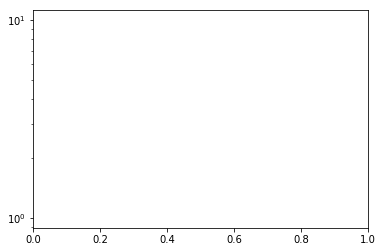

In [14]:
plt.semilogy(b.radius,enuc,label = 'burn_cell_python')
plt.semilogy(b.radius,b['Hnuc [erg/g/s]'], label = 'MAESTROeX_Hnuc')
plt.grid()
plt.xlabel('radius [cm]')
plt.ylabel('enuc [ergs/g/s]')
plt.legend()
plt.savefig("MEASTRO_vs_BurnCellPython.png")

In [15]:
r_sun = 6.955e10  # cm
radius = np.array(a["radius"])

eps_nuc2 = a['eps_nuc_mc2']
eps_nuc_neu = a['eps_nuc_neu']
e_nuc = eps_nuc2-eps_nuc_neu
#e_nuc = eps_nuc_neu
#plt.semilogy(radius*r_sun,e_nuc, label = 'MESA')

temp = np.array(a["temperature"])
#plt.plot(radius*r_sun, temp, label = 'MESA')

rho = np.power(10,np.array(a["logRho"]))
#plt.plot(radius*r_sun, rho, label = 'MESA')

h1 = np.array(a["h1"])
he4 = np.array(a["he4"])
o16 = np.array(a["o16"])
o20 = np.array(a["o20"])
f20 = np.array(a["f20"])
ne20 = np.array(a["ne20"])
mg24 = np.array(a["mg24"])
al27 = [0.0]*len(h1)
si28 = np.array(a["si28"])
p31 = [0.0]*len(h1)
s32 = [0.0]*len(h1)


In [16]:
enuc_mesa = []
for i in range(len(temp)):
    driver.set_initial_density(rho[i])
    driver.set_initial_temperature(temp[i])
    driver.set_initial_species("h1", h1[i])
    driver.set_initial_species("he4", he4[i])
    driver.set_initial_species("o16", o16[i])
    driver.set_initial_species("o20", o20[i])
    driver.set_initial_species("f20", f20[i])
    driver.set_initial_species("ne20", ne20[i])
    driver.set_initial_species("mg24", mg24[i])
    driver.set_initial_species("al27", al27[i])
    driver.set_initial_species("si28", si28[i])
    driver.set_initial_species("p31", p31[i])
    driver.set_initial_species("s32", s32[i])
    
    driver.rhs(driver.initial_burn_state)
    enuc_mesa.append(driver.get_enuc_dot(driver.initial_burn_state))
    

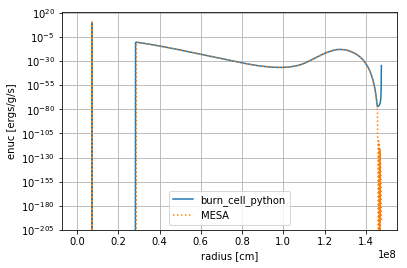

In [17]:
plt.semilogy(radius*r_sun,enuc_mesa,label = 'burn_cell_python')
plt.semilogy(radius*r_sun,e_nuc, ':', label = 'MESA')
plt.grid()
#plt.ylim(1e5,1e13)
plt.xlabel('radius [cm]')
plt.ylabel('enuc [ergs/g/s]')
plt.legend()
plt.savefig("MESA_vs_BurnCellPython.png")

In [18]:
enuc = []
for i in range(df.shape[0]):
    driver.set_initial_density(df.density[i])
    driver.set_initial_temperature(df.temperature[i])
    driver.set_initial_species("h1", df.h1[i])
    driver.set_initial_species("he4", df.he4[i])
    driver.set_initial_species("o16", df.o16[i])
    driver.set_initial_species("o20", df.o20[i])
    driver.set_initial_species("f20", df.f29[i])
    driver.set_initial_species("ne20", df.ne20[i])
    driver.set_initial_species("mg24", df.mg24[i])
    driver.set_initial_species("al27", df.al27[i])
    driver.set_initial_species("si28", df.si28[i])
    driver.set_initial_species("p31", df.p31[i])
    driver.set_initial_species("s32", df.s32[i])
    
    driver.rhs(driver.initial_burn_state)
    enuc.append(driver.get_enuc_dot(driver.initial_burn_state))
    

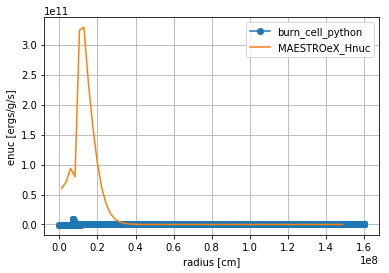

In [19]:
plt.plot(df.radius,enuc,'-o',label = 'burn_cell_python')
plt.plot(b.radius,b['Hnuc [erg/g/s]'], label = 'MAESTROeX_Hnuc')
plt.grid()
plt.xlabel('radius [cm]')
plt.ylabel('enuc [ergs/g/s]')
plt.legend()
#plt.xlim(7e6,7.05e6)
#plt.ylim(4e9,5e9)
plt.savefig("initial model.png")